In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()
X = iris.data  # Sepal and pedal negth and width
y = iris.target

In [2]:
IRIS = pd.DataFrame({'Sepal_Length':X[:,0], 'Sepal_Width':X[:,1], 'Petal_Length':X[:,2], 'Petal_Width':X[:,3], 
                     'Species':y})

In [3]:
IRIS.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
IRIS.head(8)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

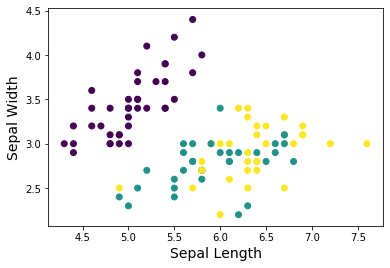

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1],   linewidths=1, c=y_train)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.show()

In [7]:
from sklearn import svm
# Linear model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
# Test result
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[11,  0,  0],
       [ 0, 14,  3],
       [ 0,  0, 17]], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

93.33333333333333

In [10]:
# get number of support vectors for each class
clf.n_support_

array([ 2, 10,  8])

In [11]:
# get indices of support vectors
clf.support_ 

array([73, 78,  9, 12, 32, 38, 39, 44, 71, 74, 88, 95, 26, 27, 31, 34, 42,
       62, 84, 96])

In [12]:
# Polynomial model
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)
# Test result
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
accuracy_score(y_test, y_predict)*100

C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


91.11111111111111

In [15]:
clf = svm.SVC(kernel='rbf', gamma=0.7)
clf.fit(X_train, y_train)
# Test result
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
accuracy_score(y_test, y_predict)*100

93.33333333333333

In [16]:
clf = svm.SVC(kernel='rbf', gamma=0.3)
clf.fit(X_train, y_train)
# Test result
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
accuracy_score(y_test, y_predict)*100

95.55555555555556

In [18]:
from sklearn.model_selection import GridSearchCV 
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 0.5, 1, 10], 'degree':[2,3,4]} 
svc = svm.SVC() 
clf = GridSearchCV(svc, parameters, cv=5) 
clf.fit(iris.data, iris.target) 
clf.best_params_

C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rothg\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

{'C': 0.1, 'degree': 2, 'kernel': 'poly'}